# Machine Learning Regression Project - Bangladesh House Price Prediction

##### Dataset can be found here - https://www.kaggle.com/datasets/ijajdatanerd/property-listing-data-in-bangladesh

#### Importing Libraries

In [83]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

### Loading Data

In [84]:
# Reading data
df1 = pd.read_csv("properties.csv")
df1.head()

,title,beds,bath,area,adress,type,purpose,flooPlan,url,lastUpdated,price
0,Eminent Apartment Of 2200 Sq Ft Is Vacant For ...,3,4,"2,200 sqft","Block A, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"August 13, 2022",50 Thousand
1,"Apartment Ready To Rent In South Khulshi, Near...",3,4,"1,400 sqft","South Khulshi, Khulshi, Chattogram",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/44...,https://www.bproperty.com/en/property/details-...,"January 25, 2022",30 Thousand
2,"Smartly priced 1950 SQ FT apartment, that you ...",3,4,"1,950 sqft","Block F, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/11...,https://www.bproperty.com/en/property/details-...,"February 22, 2023",30 Thousand
3,2000 Sq Ft Residential Apartment Is Up For Ren...,3,3,"2,000 sqft","Sector 9, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/14...,https://www.bproperty.com/en/property/details-...,"October 28, 2021",35 Thousand
4,Strongly Structured This 1650 Sq. ft Apartment...,3,4,"1,650 sqft","Block I, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"February 19, 2023",25 Thousand


In [85]:
# Looking for columns I'm interested in to prepare them for cleaning (Beds, Bath, Area, Adress, Purpose, Price)
df1.columns

Index(['title', 'beds', 'bath', 'area', 'adress', 'type', 'purpose',
       'flooPlan', 'url', 'lastUpdated', 'price'],
      dtype='object')

In [86]:
# Dropping columns I'm not interested in (Title, Type, Purpose, FlooPlan, URL, LastUpdated)
df2 = df1.drop(["title", "type", "purpose", "flooPlan", "url", "lastUpdated"], axis="columns")
df2.head()

,beds,bath,area,adress,price
0,3,4,"2,200 sqft","Block A, Bashundhara R-A, Dhaka",50 Thousand
1,3,4,"1,400 sqft","South Khulshi, Khulshi, Chattogram",30 Thousand
2,3,4,"1,950 sqft","Block F, Bashundhara R-A, Dhaka",30 Thousand
3,3,3,"2,000 sqft","Sector 9, Uttara, Dhaka",35 Thousand
4,3,4,"1,650 sqft","Block I, Bashundhara R-A, Dhaka",25 Thousand


### Data Cleaning

##### Handling Null Values

In [87]:
# Checking for null values
df2.isnull().sum()

beds      0
bath      0
area      0
adress    0
price     0
dtype: int64

##### Handling Unique Values

###### Finding Unique Values

In [88]:
# Checking that data in each column are all uniform in their presentation (Bed - Not uniform - Some are Integers, some are strings)
df2["beds"].unique()

array(['3 ', '5 ', '4 ', '1 Bed', '2 ', '17 ', '6 ', '21 ', '7 ', '20 ',
       '32 ', '22 ', '36 '], dtype=object)

In [89]:
# Checking that data in each column are all uniform in their presentation (Bath - Not uniform - Some are Integers, some are strings)
df2["bath"].unique()

array(['4 ', '3 ', '5 ', '2 ', '1 Bath', '6 ', '10 ', '8 ', '7 '],
      dtype=object)

In [90]:
# Checking that data in each column are all uniform in their presentation (Area - Uniform)
df2["area"].unique()

array(['2,200 sqft', '1,400 sqft', '1,950 sqft', '2,000 sqft',
       '1,650 sqft', '3,400 sqft', '1,600 sqft', '1,250 sqft',
       '2,150 sqft', '1,580 sqft', '3,200 sqft', '3,000 sqft',
       '1,800 sqft', '1,750 sqft', '1,310 sqft', '1,700 sqft',
       '2,750 sqft', '2,500 sqft', '550 sqft', '1,050 sqft', '1,350 sqft',
       '3,590 sqft', '400 sqft', '2,400 sqft', '500 sqft', '2,300 sqft',
       '4,350 sqft', '1,200 sqft', '800 sqft', '2,146 sqft', '1,315 sqft',
       '1,500 sqft', '700 sqft', '600 sqft', '960 sqft', '4,200 sqft',
       '2,250 sqft', '1,517 sqft', '6,300 sqft', '1,407 sqft',
       '1,850 sqft', '1,150 sqft', '900 sqft', '1,975 sqft', '1,300 sqft',
       '1,450 sqft', '950 sqft', '1,100 sqft', '2,600 sqft', '750 sqft',
       '2,115 sqft', '3,600 sqft', '3,150 sqft', '2,100 sqft',
       '1,319 sqft', '1,676 sqft', '1,825 sqft', '2,977 sqft', '350 sqft',
       '1,550 sqft', '450 sqft', '1,190 sqft', '2,230 sqft', '2,280 sqft',
       '2,197 sqft', '1,393 sq

In [91]:
# Checking that data in each column are all uniform in their presentation (Adress - Uniform)
df2["adress"].unique()

array(['Block A, Bashundhara R-A, Dhaka',
       'South Khulshi, Khulshi, Chattogram',
       'Block F, Bashundhara R-A, Dhaka', 'Sector 9, Uttara, Dhaka',
       'Block I, Bashundhara R-A, Dhaka', 'Gulshan 1, Gulshan, Dhaka',
       'Sector 6, Uttara, Dhaka', 'Block K, Bashundhara R-A, Dhaka',
       'Sector 10, Uttara, Dhaka', 'Bayazid, Chattogram',
       'Gulshan 2, Gulshan, Dhaka', 'Sector 12, Uttara, Dhaka',
       'Block D, Bashundhara R-A, Dhaka',
       'Block C, Bashundhara R-A, Dhaka',
       'Ward 23, Chowdhuripara, Khilgaon, Dhaka',
       'Sector 3, Uttara, Dhaka', 'Banani, Dhaka', 'Dhanmondi, Dhaka',
       'Block J, Baridhara, Dhaka', 'West Shewrapara, Mirpur, Dhaka',
       'Block D, Mohanagar Housing, West Rampura, Rampura, Dhaka',
       'Zakir Hossain Housing Society, South Khulshi, Khulshi, Chattogram',
       'Banani DOHS, Dhaka', 'Block J, Bashundhara R-A, Dhaka',
       'Khilkhet, Dhaka', 'Block C, Dhaka Uddan, Mohammadpur, Dhaka',
       'Mohammadi Housing LTD.

In [92]:
# Checking that data in each column are all uniform in their presentation (Price - Not uniform - Need to convert Lakh to Thousands)
df2["price"].unique()

array(['50 Thousand', '30 Thousand', '35 Thousand', '25 Thousand',
       '1.1 Lakh', '23 Thousand', '40 Thousand', '20 Thousand',
       '2.5 Lakh', '1.2 Lakh', '21 Thousand', '60 Thousand',
       '28 Thousand', '75 Thousand', '55 Thousand', '12 Thousand',
       '2 Lakh', '10 Thousand', '18 Thousand', '1.5 Lakh', '85 Thousand',
       '70 Thousand', '43 Thousand', '1 Lakh', '80 Thousand',
       '45 Thousand', '26 Thousand', '16 Thousand', '14.5 Thousand',
       '14 Thousand', '15 Thousand', '90 Thousand', '4 Lakh', '3.5 Lakh',
       '27 Thousand', '22 Thousand', '15.5 Thousand', '95 Thousand',
       '42 Thousand', '13 Thousand', '11.5 Thousand', '7.3 Thousand',
       '1.7 Lakh', '36 Thousand', '32 Thousand', '17 Thousand',
       '13.5 Thousand', '34 Thousand', '1.8 Lakh', '65 Thousand',
       '1.65 Lakh', '19 Thousand', '18.6 Thousand', '1.3 Lakh',
       '4.2 Lakh', '47 Thousand', '72 Thousand', '1.6 Lakh', '2.8 Lakh',
       '1.4 Lakh', '9 Thousand', '1.25 Lakh', '3 Lakh', 

###### Changing presentation of unique values

In [93]:
df3 = df2.copy()

In [94]:
# Changing beds to uniform presentation
df3["beds"] = df2["beds"].apply(lambda x: int(x.split(" ")[0]))
df3["beds"].unique()

array([ 3,  5,  4,  1,  2, 17,  6, 21,  7, 20, 32, 22, 36], dtype=int64)

In [95]:
# Changing bath to uniform presentation
df3["bath"] = df2["bath"].apply(lambda x: int(x.split(" ")[0]))
df3["bath"].unique()

array([ 4,  3,  5,  2,  1,  6, 10,  8,  7], dtype=int64)

In [96]:
# Changing price to uniform presentation (1 Lakh equals 100,000 Taka)
def lakhToTaka(x):
    if "Lakh" in x:
        return float(x.split(" ")[0])*100
    else:
        return float(x.split(" ")[0])

df3["price"] = df2["price"].astype("str")
df3["price"] = df3["price"].apply(lakhToTaka)
df3["price"].unique()

array([  50.  ,   30.  ,   35.  ,   25.  ,  110.  ,   23.  ,   40.  ,
         20.  ,  250.  ,  120.  ,   21.  ,   60.  ,   28.  ,   75.  ,
         55.  ,   12.  ,  200.  ,   10.  ,   18.  ,  150.  ,   85.  ,
         70.  ,   43.  ,  100.  ,   80.  ,   45.  ,   26.  ,   16.  ,
         14.5 ,   14.  ,   15.  ,   90.  ,  400.  ,  350.  ,   27.  ,
         22.  ,   15.5 ,   95.  ,   42.  ,   13.  ,   11.5 ,    7.3 ,
        170.  ,   36.  ,   32.  ,   17.  ,   13.5 ,   34.  ,  180.  ,
         65.  ,  165.  ,   19.  ,   18.6 ,  130.  ,  420.  ,   47.  ,
         72.  ,  160.  ,  280.  ,  140.  ,    9.  ,  125.  ,  300.  ,
         37.  ,   16.5 ,    9.5 ,   33.  ,  450.  ,   63.  , 1000.  ,
         11.  ,   19.05,   12.5 ,   38.  ,   17.5 ,  135.  ,  190.  ,
         24.  ,   35.5 ,    6.  ,   18.5 ,  500.  ,  700.  ,   39.  ,
          8.  ,    5.5 ,   71.  ,   31.  ,   12.8 ,   52.  ,  115.  ,
        220.  ,   46.  ,  290.  ,   58.  ,  215.  ,   88.  ,   11.3 ,
         57.  ,  230

In [97]:
# Changing area values to integers
def areaToInt(x):
    x = x.replace(",", "")
    x = int(x.split(" ")[0])
    return x

df3["area"] = df2["area"].astype("str")
df3["area"] = df3["area"].apply(areaToInt)
df3["area"].unique()

array([ 2200,  1400,  1950,  2000,  1650,  3400,  1600,  1250,  2150,
        1580,  3200,  3000,  1800,  1750,  1310,  1700,  2750,  2500,
         550,  1050,  1350,  3590,   400,  2400,   500,  2300,  4350,
        1200,   800,  2146,  1315,  1500,   700,   600,   960,  4200,
        2250,  1517,  6300,  1407,  1850,  1150,   900,  1975,  1300,
        1450,   950,  1100,  2600,   750,  2115,  3600,  3150,  2100,
        1319,  1676,  1825,  2977,   350,  1550,   450,  1190,  2230,
        2280,  2197,  1393,  1260,   650,  1075,  9000,  1365,  1165,
        1240,  1630,  1806,  1360,  2170,  1370,  2560,  1615,  3350,
        1375,  3500,  4000,  1807,  1288,  1472,  2595,  1000,  2153,
        1910,  2960,   720,  4400,  1280,  2350,  1880,  3800,  1935,
        3187,  1520,   920,  1911,  1532,  1395,  2450,  1330,  2145,
        8000,  4500,  1560,  1599,  1793,  3300,  2550,  1665, 16100,
        1960,  1495,  2210,  2700,  2800,  2780,  2080,   850,  1780,
         725,  1570,

##### Changing column headings to fix spelling errors and to be more informative

In [98]:
df4 = df3.copy()

In [99]:
df4["baths"] = df4["bath"]
df4["area (sq feet)"] = df4["area"]
df4["price (thousand taka)"] = df4["price"]
df4["address"] = df4["adress"]
df4 = df4.drop(["bath", "area", "adress", "price"], axis="columns")
df4.head()

,beds,baths,area (sq feet),price (thousand taka),address
0,3,4,2200,50.0,"Block A, Bashundhara R-A, Dhaka"
1,3,4,1400,30.0,"South Khulshi, Khulshi, Chattogram"
2,3,4,1950,30.0,"Block F, Bashundhara R-A, Dhaka"
3,3,3,2000,35.0,"Sector 9, Uttara, Dhaka"
4,3,4,1650,25.0,"Block I, Bashundhara R-A, Dhaka"


##### Finding anomalous price values

In [100]:
df5 = df4.copy()
mean = df5["price (thousand taka)"].mean()
std = df5["price (thousand taka)"].std()
Q1 = df5["price (thousand taka)"].quantile(0.25)
Q3 = df5["price (thousand taka)"].quantile(0.75)
IQR = Q3 - Q1
df5.shape

(7557, 5)

###### Eliminating Anomalies using IQR

In [101]:
# Finding the values at which point data becomes anomalous (1.5 * IQR below or above Q1 and Q3 respectively)
low_anoms = Q1 - (IQR * 1.5)
high_anoms = Q3 + (IQR * 1.5)

In [102]:
# Eliminating anomalies
df5 = df5[(df5["price (thousand taka)"] > low_anoms) & (df5["price (thousand taka)"] < high_anoms)]
df5.shape

(6714, 5)

###### Eliminating Anomalies using Standard Deviation

In [103]:
# Finding the values at which point data becomes anomalous (3 Standard Deviations away from the mean)
low_anoms = mean - (std * 3)
high_anoms = mean + (std * 3)

In [104]:
# Eliminating anomalies
df5 = df5[(df5["price (thousand taka)"] > low_anoms) & (df5["price (thousand taka)"] < high_anoms)]
df5.shape

(6714, 5)

###### Eliminating Anomalies using Z Score

In [105]:
# Creating a column where z scores are calculated
df5["zscore"] = (df5["price (thousand taka)"] - mean) / std
df5.head()

,beds,baths,area (sq feet),price (thousand taka),address,zscore
0,3,4,2200,50.0,"Block A, Bashundhara R-A, Dhaka",0.246030
1,3,4,1400,30.0,"South Khulshi, Khulshi, Chattogram",-0.063034
2,3,4,1950,30.0,"Block F, Bashundhara R-A, Dhaka",-0.063034
3,3,3,2000,35.0,"Sector 9, Uttara, Dhaka",0.014232
4,3,4,1650,25.0,"Block I, Bashundhara R-A, Dhaka",-0.140300


In [106]:
# Eliminating anomalies (Values with a z score above 3 and below -3), then dropping the z score column
df5 = df5[(df5["zscore"] > -3) & (df5["zscore"] < 3)]
df5 = df5.drop(["zscore"], axis="columns")
df5.shape

(6714, 5)

### Feature Engineering

In [107]:
df6 = df5.copy()
df6.head()

,beds,baths,area (sq feet),price (thousand taka),address
0,3,4,2200,50.0,"Block A, Bashundhara R-A, Dhaka"
1,3,4,1400,30.0,"South Khulshi, Khulshi, Chattogram"
2,3,4,1950,30.0,"Block F, Bashundhara R-A, Dhaka"
3,3,3,2000,35.0,"Sector 9, Uttara, Dhaka"
4,3,4,1650,25.0,"Block I, Bashundhara R-A, Dhaka"


#### Adding Price per Square Feet

In [108]:
# Adding a column where price per square feet is calculated
df6["price (taka) per sq feet"] = (df6["price (thousand taka)"] / df6["area (sq feet)"])*1000
df6.head()

,beds,baths,area (sq feet),price (thousand taka),address,price (taka) per sq feet
0,3,4,2200,50.0,"Block A, Bashundhara R-A, Dhaka",22.727273
1,3,4,1400,30.0,"South Khulshi, Khulshi, Chattogram",21.428571
2,3,4,1950,30.0,"Block F, Bashundhara R-A, Dhaka",15.384615
3,3,3,2000,35.0,"Sector 9, Uttara, Dhaka",17.500000
4,3,4,1650,25.0,"Block I, Bashundhara R-A, Dhaka",15.151515


### Finding Correlations

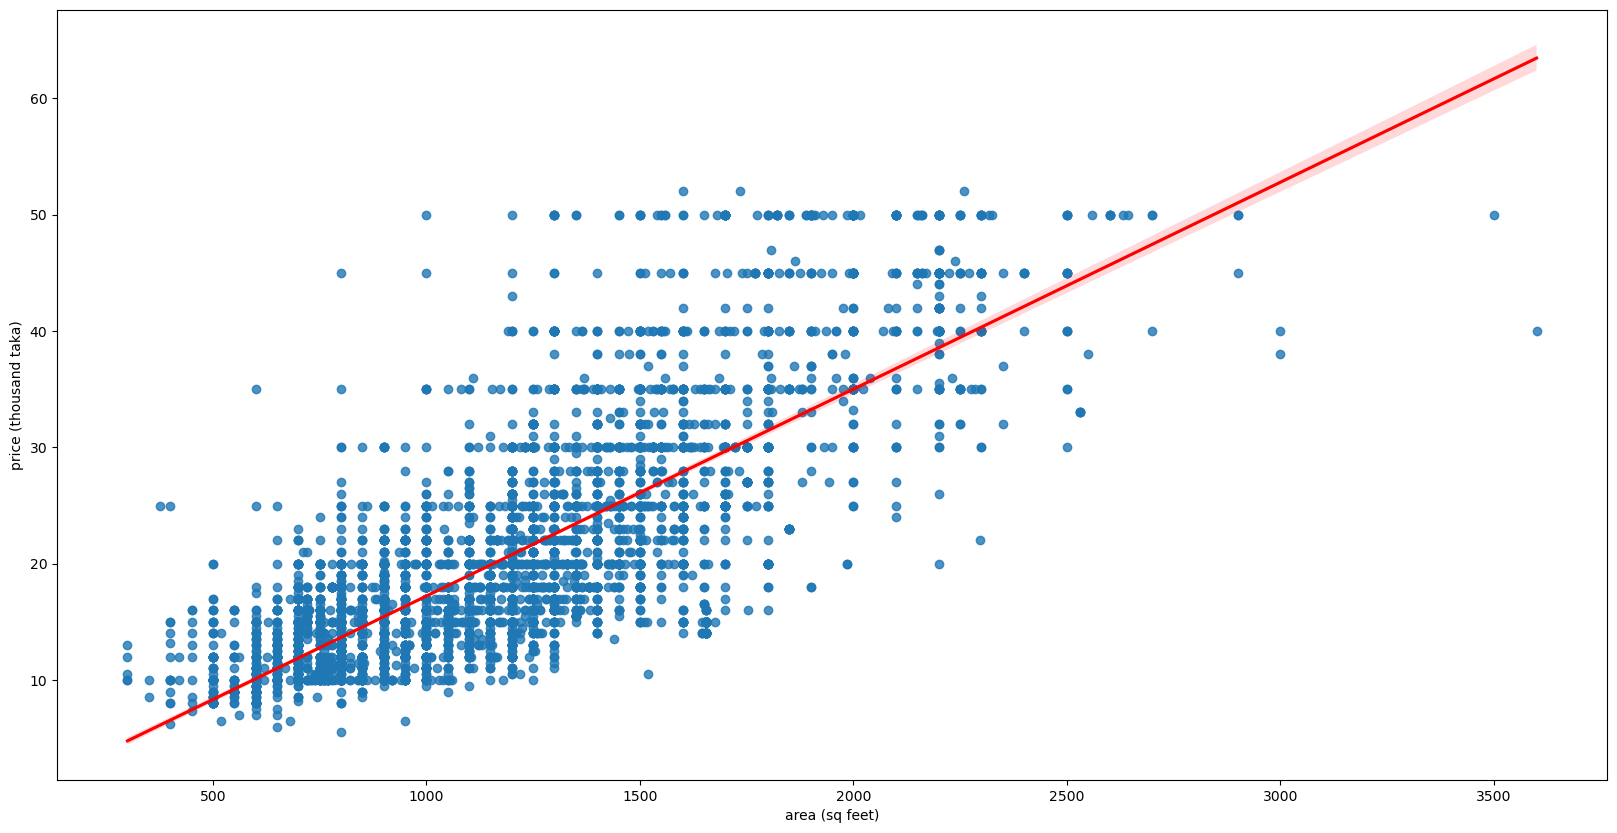

In [113]:
# Price vs Area
priceVsArea = sns.regplot(x="area (sq feet)", y="price (thousand taka)", data=df6, line_kws={"color": "red"})

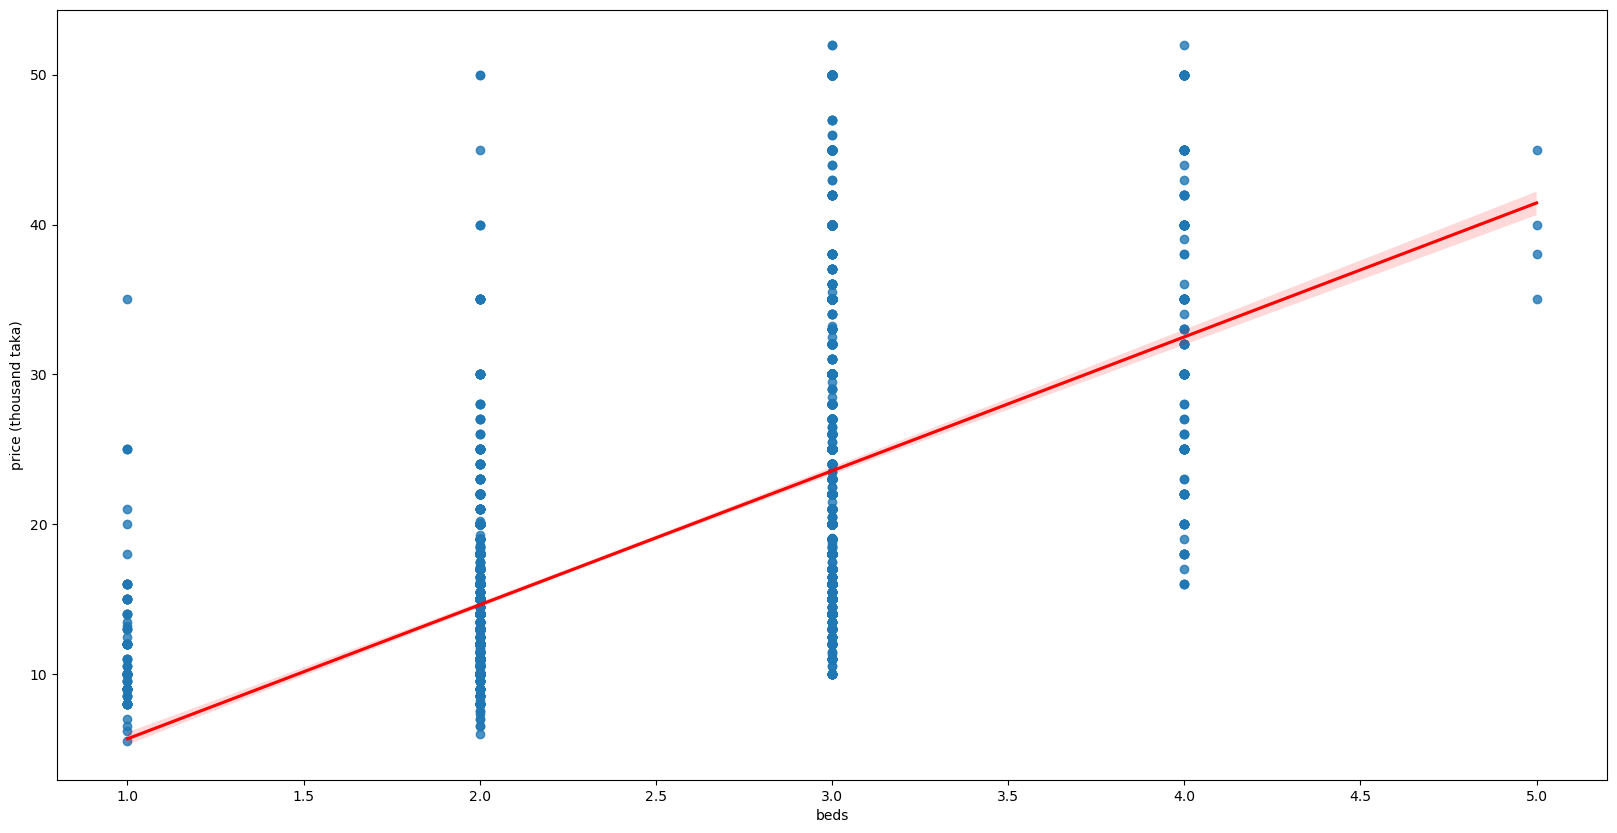

In [115]:
# Price vs Beds
priceVsBeds = sns.regplot(x="beds", y="price (thousand taka)", data=df6, line_kws={"color": "red"})

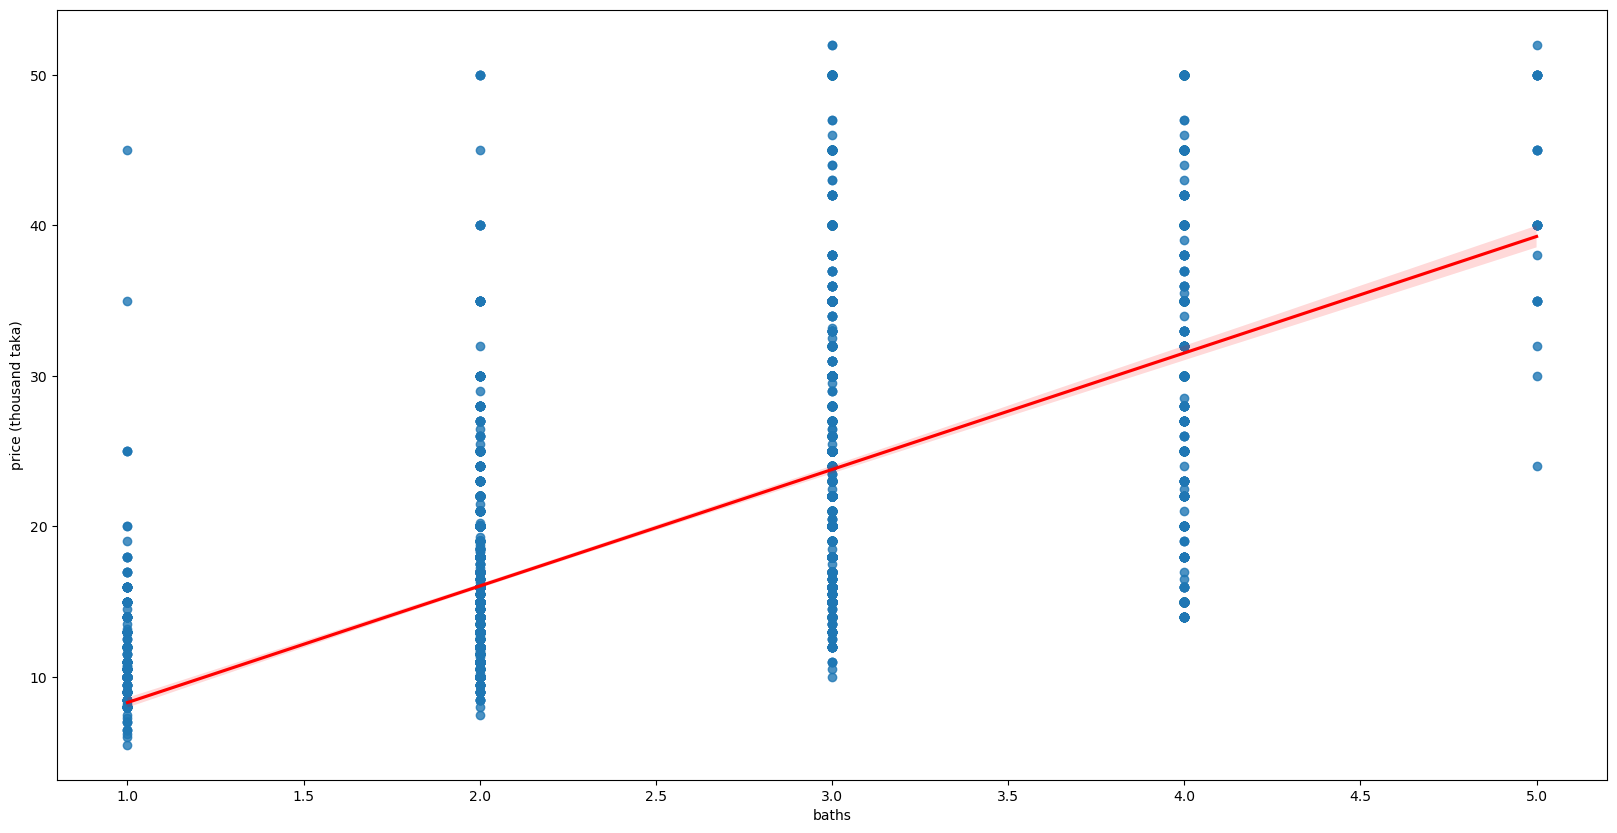

In [116]:
# Price vs Baths
priceVsBaths = sns.regplot(x="baths", y="price (thousand taka)", data=df6, line_kws={"color": "red"})